# 
DATA EXPLORATION AND VISUALIZATION PROJECT- Analytical Dashboard in Python

Made by- Sahibe Aalam Roll no. 045002

About: The dataset provides comprehensive information on villages in the states of Uttar Pradesh under the Antyodaya Yojana, a government initiative aimed at uplifting the socio-economic status of the most vulnerable and marginalized populations. The data encompasses a wide range of parameters, allowing for a thorough analysis of the villages' demographic, economic, and infrastructural characteristics.

It includes details such as population demographics, household engagement in farm and non-farm activities, agricultural practices, irrigation methods, infrastructure development, educational facilities, healthcare services, and various government schemes' implementation.

For example, the dataset reveals that villages in Sitapur and Shahjahanpur districts have varying characteristics, such as differences in land use, agricultural practices, access to essential services, and infrastructure development. Notably, the availability of irrigation facilities, educational institutions, healthcare services, and financial inclusion initiatives like the Pradhan Mantri Jan Dhan Yojana and the Saubhagya Scheme are key aspects covered in the dataset.

Understanding this data can aid in formulating targeted interventions and policies under the Antyodaya Yojana to address specific needs and challenges faced by these villages. It provides a foundation for in-depth analysis and informed decision-making to enhance the overall socio-economic well-being of the communities covered by the Antyodaya Yojana.

In [1]:
pip install pandas streamlit plotly matplotlib dash


                                              0.0/10.2 MB ? eta -:--:--
                                              0.1/10.2 MB 1.7 MB/s eta 0:00:07
     -                                        0.3/10.2 MB 3.3 MB/s eta 0:00:04
     -                                        0.5/10.2 MB 3.5 MB/s eta 0:00:03
     -                                        0.5/10.2 MB 2.9 MB/s eta 0:00:04
     ---                                      0.9/10.2 MB 4.0 MB/s eta 0:00:03
     ----                                     1.1/10.2 MB 4.4 MB/s eta 0:00:03
     ----                                     1.2/10.2 MB 4.2 MB/s eta 0:00:03
     ------                                   1.6/10.2 MB 4.5 MB/s eta 0:00:02
     -------                                  1.8/10.2 MB 4.4 MB/s eta 0:00:02
     -------                                  1.9/10.2 MB 4.5 MB/s eta 0:00:02
     -------                                  1.9/10.2 MB 4.5 MB/s eta 0:00:02
     -------                                  1.9/10.2 MB 4

In [19]:
import pandas as pd
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


In [20]:
import pandas as pd

# Provide the correct file path
file_path = r'C:\Users\asus\OneDrive\Desktop\MBA-BDA\SUBJECT Term 2\DEV2\DATA ANTAYODYA UP.csv'

# Import & Read Dataset
df = pd.read_csv(file_path)

# Display Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103064 entries, 0 to 103063
Columns: 162 entries, STATE NAME to Year
dtypes: float64(11), int64(75), object(76)
memory usage: 127.4+ MB


In [35]:
app = dash.Dash(__name__)


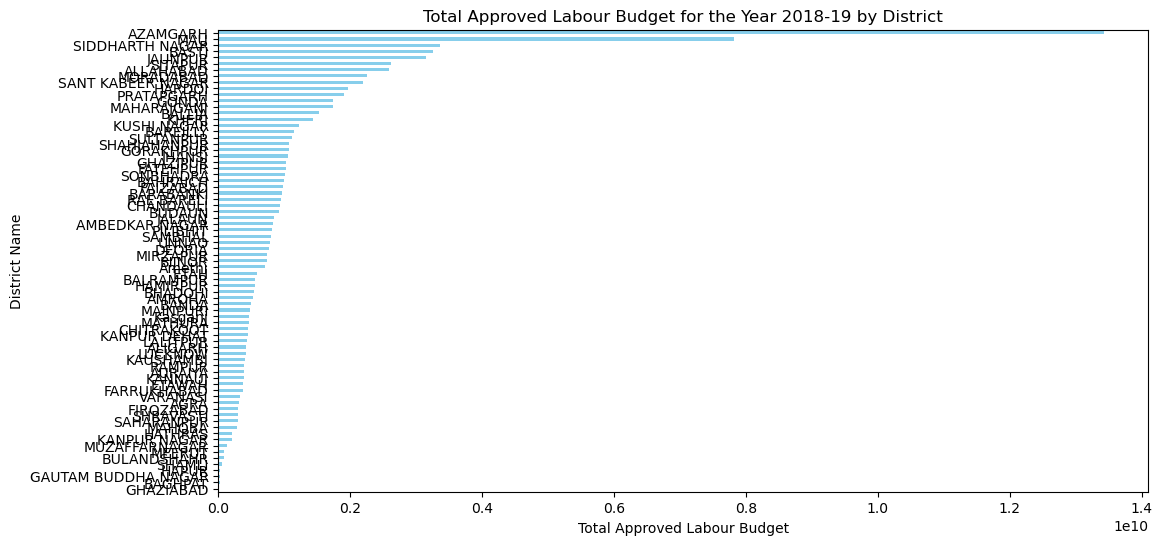

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named df
# Replace 'YourDataFrame.csv' with the actual file or DataFrame
# df = pd.read_csv('YourDataFrame.csv')

# Assuming 'District Name' and 'Budget Allocation' are column names
district_budget_data = df[['DISTRICT NAME', 'TOTAL APPROVED LABOUR BUDGET FOR THE YEAR 2018-19']]

# Group by District and sum the budget allocations
district_budget_sum = district_budget_data.groupby('DISTRICT NAME')['TOTAL APPROVED LABOUR BUDGET FOR THE YEAR 2018-19'].sum()

# Plotting
plt.figure(figsize=(12, 6))
district_budget_sum.sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Approved Labour Budget for the Year 2018-19 by District')
plt.xlabel('Total Approved Labour Budget')
plt.ylabel('District Name')
plt.show()


Analysis:
The image shows a horizontal bar chart titled "Total Approved Labour Budget for the Year 2018-19 by District." The chart lists various districts on the y-axis and the total approved labor budget on the x-axis, with the budget amounts represented in scientific notation (1e8, which stands for 10^8 or 100,000,000).

From a managerial perspective, the implications of this chart could include:

1. **Budget Allocation:** Managers can use this chart to understand how labor budgets are distributed across different districts. This can inform decisions on resource allocation, project planning, and prioritization of initiatives based on the budget available in each district.

2. **Performance Evaluation:** By comparing the labor budget with the output or productivity of each district, managers can assess the efficiency and effectiveness of budget utilization. Districts with higher budgets should ideally show proportionately higher outputs.

3. **Strategic Planning:** Managers responsible for multiple districts can use this data to strategize where to focus their efforts. For example, districts with larger budgets may have more significant projects underway, requiring closer management and oversight.

4. **Resource Optimization:** Understanding the budget distribution can help managers identify opportunities for cost savings or reallocation of funds to ensure that each district has the necessary resources to meet its objectives.

5. **Policy Implications:** For policymakers, this chart could highlight the need for a more equitable distribution of labor budgets or prompt an investigation into why certain districts receive more funds than others.

6. **Forecasting and Trend Analysis:** Managers can use historical budget data in conjunction with this chart to identify trends in budget allocation over time, which can be useful for forecasting future budget needs and preparing for upcoming fiscal periods.

7. **Stakeholder Communication:** This chart can serve as a communication tool to discuss budget allocations with stakeholders, including local government officials, community leaders, and project teams, to ensure transparency and align expectations.

It's important to note that while the chart provides a snapshot of the approved labor budget, it does not offer insights into the actual spending, the outcomes achieved with the budget, or the specific needs and challenges of each district. Managers would need additional qualitative and quantitative data to make informed decisions.

In [34]:


# District budget bar chart
district_budget_data = df[['DISTRICT NAME', 'TOTAL APPROVED LABOUR BUDGET FOR THE YEAR 2018-19']]
district_budget_sum = district_budget_data.groupby('DISTRICT NAME')['TOTAL APPROVED LABOUR BUDGET FOR THE YEAR 2018-19'].sum()

# Top 10 populated districts bar chart
selected_columns = ['DISTRICT NAME', 'NUMBER OF TOTAL POPULATION', 'NUMBER OF MALE', 'NUMBER OF FEMALE']
district_population_data = df[selected_columns]
sorted_data = district_population_data.sort_values(by='NUMBER OF TOTAL POPULATION', ascending=False)
top_10_populated = sorted_data.head(10)

# Define the layout of your dashboard
app.layout = html.Div(children=[
    html.H1("Your Dashboard Title"),

    # District Budget Bar Chart
    dcc.Graph(
        id='budget-bar-chart',
        figure={
            'data': [
                {'x': district_budget_sum.index, 'y': district_budget_sum.values, 'type': 'bar', 'name': 'Budget'},
            ],
            'layout': {
                'title': 'Total Approved Labour Budget for the Year 2018-19 by District',
                'xaxis': {'title': 'District Name'},
                'yaxis': {'title': 'Total Approved Labour Budget'},
            }
        }
    ),

    # Top 10 Populated Districts Bar Chart
    dcc.Graph(
        id='population-bar-chart',
        figure={
            'data': [
                {'x': top_10_populated['DISTRICT NAME'], 'y': top_10_populated[col], 'type': 'bar', 'name': col} for col in
                ['NUMBER OF TOTAL POPULATION', 'NUMBER OF MALE', 'NUMBER OF FEMALE']
            ],
            'layout': {
                'title': 'Top 10 Populated Districts',
                'xaxis': {'title': 'District Name'},
                'yaxis': {'title': 'Population Count'},
                'barmode': 'stack',
            }
        }
    ),
])

 

  # ... (previous code)

# Scatter plot for the relationship between total population and area covered under irrigation
scatter_fig = px.scatter(df, x='NUMBER OF TOTAL POPULATION', y='TOTAL AREA COVERED UNDER IRRIGATION (DRIP, SPRINKLER), IF IN ACRES DIVIDE BY 2.47',
                         color='MAIN SOURCE OF IRRIGATION', title='Population vs. Area Covered Under Irrigation')
scatter_fig.update_layout(xaxis_title='Total Population', yaxis_title='Area Covered Under Irrigation (in acres)')

# Bar chart for the main source of irrigation
bar_chart_fig = px.bar(df, x='MAIN SOURCE OF IRRIGATION', title='Main Source of Irrigation',
                       labels={'MAIN SOURCE OF IRRIGATION': 'Irrigation Source', 'count': 'Count'},
                       color_discrete_sequence=['lightgreen'])
bar_chart_fig.update_layout(xaxis_title='Irrigation Source', yaxis_title='Count')

# ... (remaining code)

# Update the layout of your dashboard
app.layout = html.Div(children=[
    html.H1("Your Dashboard Title"),

    # District Budget Bar Chart
    dcc.Graph(
        id='budget-bar-chart',
        figure={
            'data': [
                {'x': district_budget_sum.index, 'y': district_budget_sum.values, 'type': 'bar', 'name': 'Budget'},
            ],
            'layout': {
                'title': 'Total Approved Labour Budget for the Year 2018-19 by District',
                'xaxis': {'title': 'District Name'},
                'yaxis': {'title': 'Total Approved Labour Budget'},
            }
        }
    ),

    # Top 10 Populated Districts Bar Chart
    dcc.Graph(
        id='population-bar-chart',
        figure={
            'data': [
                {'x': top_10_populated['DISTRICT NAME'], 'y': top_10_populated[col], 'type': 'bar', 'name': col} for col in
                ['NUMBER OF TOTAL POPULATION', 'NUMBER OF MALE', 'NUMBER OF FEMALE']
            ],
            'layout': {
                'title': 'Top 10 Populated Districts',
                'xaxis': {'title': 'District Name'},
                'yaxis': {'title': 'Population Count'},
                'barmode': 'stack',
            }
        }
    ),

   

])

# ... (remaining code)
 


# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


# Analysis

This is a stacked bar chart titled "Top 10 Populated Districts," showing the population count for different districts, with the population divided into three categories: Total Population, Male, and Female. Each bar represents a district, and the length of the bar indicates the total population of that district. The colors within each bar show the proportion of the population that is male (orange) and female (green), with the total population being the sum of the two.

From the chart, we can observe the following:

1. The district with the highest total population among the ones listed is the first one on the left, although the name is not fully visible. It has a population count close to 50,000.

2. The second district from the left, which appears to be named "ETAH," has the second-highest population, with slightly fewer males than the leading district.

3. The third district, "SAHARANPUR," has a similar population count to ETAH, with a slightly higher female population.

4. The remaining districts have progressively smaller populations, with the last two districts having the least, both with populations under 30,000.

5. In all districts, the male population is consistently higher than the female population.

6. The chart does not provide exact numbers, so the analysis is based on visual estimation.

7. The district names are repeated, which suggests that the data might be grouped by certain criteria not specified in the chart (e.g., different years, different areas within the same district, or other distinguishing factors).

Without additional context or data, it's difficult to provide a more detailed analysis, but the chart effectively communicates the relative population sizes and gender distribution across the top 10 populated districts in the dataset.

# Managerial Implication:

Managerial implication:
1. **Targeted Resource Allocation:**
   - Utilize the detailed demographic and economic data to allocate resources effectively. Identify villages with higher populations engaged in farm activities, prioritize them for agricultural support programs, and allocate funds for the development of necessary infrastructure.

2. **Infrastructure Development:**
   - Focus on villages lacking essential infrastructure. Prioritize areas without access to all-weather roads, electricity, or proper sanitation facilities. This can enhance the overall living conditions and stimulate economic activities in these regions.

3. **Agricultural Interventions:**
   - Tailor agricultural interventions based on the specific needs of each village. Consider the variations in cultivable land, irrigation methods, and the number of farmers. This targeted approach can enhance agricultural productivity and support farmers more effectively.

4. **Education and Skill Development:**
   - Identify villages with a higher number of children not attending school. Implement educational programs and interventions to increase school attendance. Additionally, focus on skill development initiatives to empower individuals engaged in non-farm activities.

5. **Healthcare Services Enhancement:**
   - Prioritize villages with limited access to healthcare services. Enhance healthcare infrastructure and services, especially in areas with a higher prevalence of anaemic pregnant women or where the number of underweight children is significant.

6. **Financial Inclusion Strategies:**
   - Leverage the data on households having Jan-Dhan bank accounts. Implement targeted financial inclusion strategies, promoting awareness about government schemes and facilitating easy access to banking services, especially in villages with fewer households benefiting from such schemes.

7. **Renewable Energy Adoption:**
   - Identify villages without reliable access to electricity and explore the adoption of solar energy or wind energy initiatives. This not only addresses energy needs but also aligns with sustainable development goals.

8. **Promotion of Government Schemes:**
   - Increase awareness and participation in government schemes. Utilize the data to identify villages with lower enrollment in schemes such as Pradhan Mantri Ujjwala Yojana or Pradhan Mantri Kisan Pension Yojana. Implement targeted awareness campaigns to maximize the benefits of these schemes.

9. **Community Development Initiatives:**
   - Encourage the formation of self-help groups (SHGs) and federate them into village organizations (VOs). This approach can foster community-led development and enhance the effectiveness of various government initiatives.

10. **Continuous Monitoring and Evaluation:**
    - Establish a robust monitoring and evaluation system to track the impact of implemented interventions. Regularly assess the progress and modify strategies based on emerging trends and challenges in each village, ensuring a dynamic and responsive approach to development.

# code source- chat gpt
# data sorce- data.gov.in